In [83]:
#import necessary libraries for logistic regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

In [84]:
age = np.array([16,24,31,29,40,33,18,15,19,21,29,31,24,20,34,22,32,36,37])
job = np.array([0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,1,1,1])

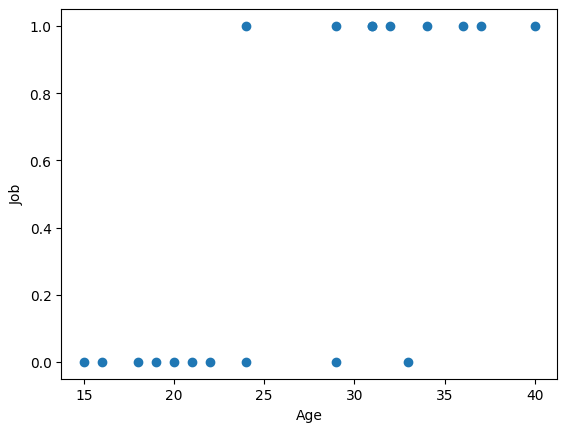

In [85]:
plt.scatter(age,job)
plt.xlabel('Age')
plt.ylabel('Job')
plt.show()

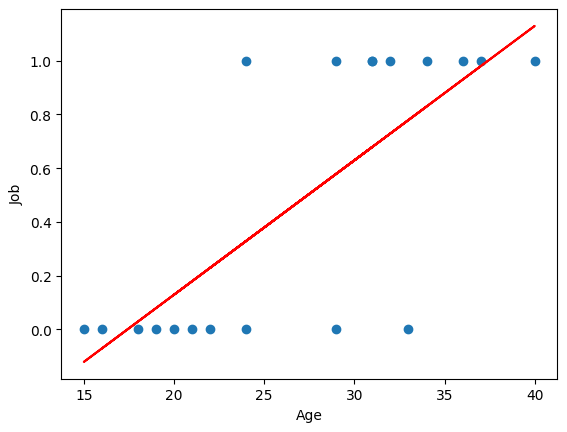

In [86]:
m, c = np.polyfit(age, job, 1)
plt.xlabel('Age')
plt.ylabel('Job')
plt.scatter(age,job)
plt.plot(age, m*age + c, color='red')
plt.show()

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
data = pd.read_csv('/content/drive/MyDrive/ML/Datasets/Bank.csv')
data.head()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [90]:
data.tail()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,222,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,196,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,62,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,200,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,112,1.1,93.994,-36.4,4.859,5191.0,0


In [91]:
data.isnull().sum()

,0
age,0
duration,0
emp_var_rate,0
cons_price_idx,0
cons_conf_idx,0
euribor3m,0
nr_employed,0
y,0


In [92]:
data.shape

(41188, 8)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   emp_var_rate    41188 non-null  float64
 3   cons_price_idx  41188 non-null  float64
 4   cons_conf_idx   41188 non-null  float64
 5   euribor3m       41188 non-null  float64
 6   nr_employed     41188 non-null  float64
 7   y               41188 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 2.5 MB


In [94]:
data.duplicated().sum()

1281

In [95]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [96]:
data.describe()

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,39907.000000,39907.000000,39907.000000,39907.000000,39907.000000,39907.000000,39907.000000,39907.000000
mean,40.083695,261.913198,0.060709,93.571762,-40.525502,3.597261,5166.099015,0.116170
std,10.478291,262.116815,1.579431,0.582333,4.650490,1.743267,72.808344,0.320433
min,17.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,103.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,182.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,325.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


<Axes: >

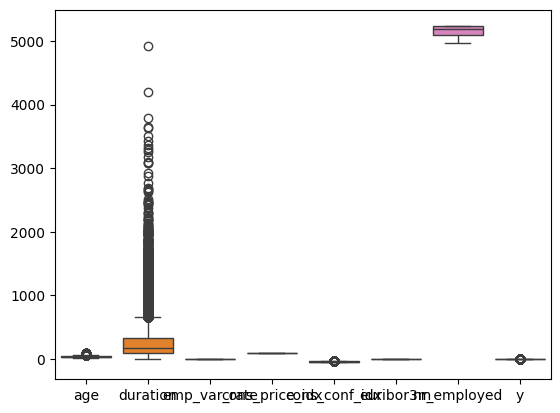

In [97]:
#check ouliers
sns.boxplot(data=data)

In [98]:
# allocate x and y
x = data.drop(['y'], axis=1)
y = data['y']

In [99]:
x.shape

(39907, 7)

In [100]:
y.value_counts()

,count
y,
0,35271
1,4636


In [101]:
# allocate training split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [102]:
len(x_train)

31925

In [103]:
# train the model
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
model.intercept_

array([0.00374136])

In [105]:
model.coef_

array([[ 0.00188421,  0.00440161, -0.29637828,  0.42706904,  0.04645847,
        -0.18648085, -0.0080379 ]])

In [106]:
y_pred = model.predict(x_test)

In [107]:
y_test

,y
36156,0
18021,0
31797,0
34440,0
8537,0
...,...
38368,0
22863,0
17573,1
767,0


In [108]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
y_pred_prob = model.predict_proba(x_test)
# probability value prediction for 0 and 1
# If it is more than 0.5 we can decide whether it is 0 or 1
# Here the positive class has been taken as 0
y_pred_prob

array([[0.98162533, 0.01837467],
       [0.98825314, 0.01174686],
       [0.79583698, 0.20416302],
       ...,
       [0.89667808, 0.10332192],
       [0.99145993, 0.00854007],
       [0.7079991 , 0.2920009 ]])

**Getting probability Values**

In [110]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
# getting predicted probability values of class 1 as a 1D array

In [111]:
y_pred_prob

array([0.01837467, 0.01174686, 0.20416302, ..., 0.10332192, 0.00854007,
       0.2920009 ])

In [112]:
confusion_matrix(y_test, y_pred)

array([[6892,  162],
       [ 626,  302]])

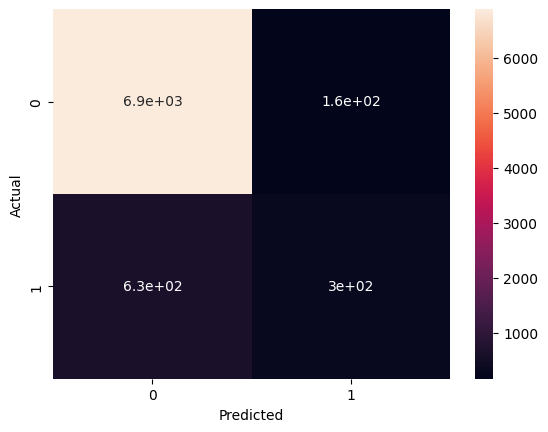

In [113]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [114]:
from sklearn.preprocessing import MinMaxScaler

In [115]:
scaler = MinMaxScaler()
data_normalised = scaler.fit_transform(data)

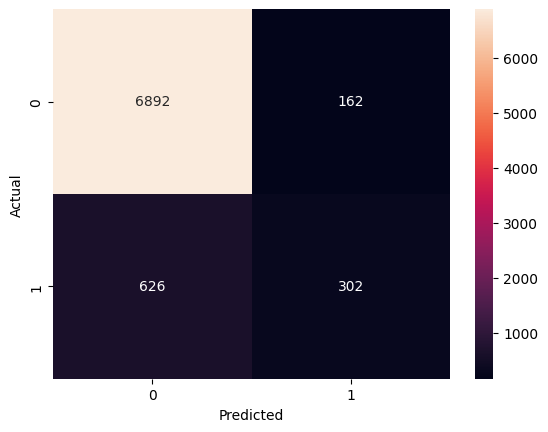

In [116]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Evaluation Metrics**

In [117]:
accuracy_score(y_test, y_pred)

0.9012778752192433

In [118]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95      7054\n           1       0.65      0.33      0.43       928\n\n    accuracy                           0.90      7982\n   macro avg       0.78      0.65      0.69      7982\nweighted avg       0.89      0.90      0.89      7982\n'

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7054
           1       0.65      0.33      0.43       928

    accuracy                           0.90      7982
   macro avg       0.78      0.65      0.69      7982
weighted avg       0.89      0.90      0.89      7982



In [120]:
fpr,tpr,_=roc_curve(y_test,y_pred_prob)#we are going to produce the curve


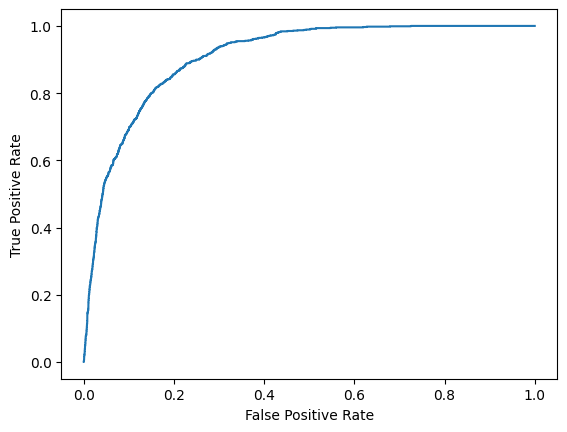

In [121]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [122]:
roc_auc_score(y_test,y_pred_prob)

0.9089133366492966

In [123]:
y_test.head()

,y
36156,0
18021,0
31797,0
34440,0
8537,0


# How To get predictions

In [124]:
arr=np.array([28,339,-1.7,94.055,-39.8,0.729,4991]).reshape(1, 7)

In [125]:
model.predict(arr)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [126]:
#comparing test (Actual values) and prediction

In [127]:
result=pd.DataFrame(data=[y_test.values,y_pred],index=['Actual','Predicted'])

In [128]:
result.transpose()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7977,0,0
7978,0,0
7979,1,0
7980,0,0


# to chek how many avlue sare correct

In [129]:
correct_sum=[]
pred=model.predict(x_test)
correct=np.sum(pred==y_test)
correct_sum.append(correct)

In [130]:
correct_sum

[7194]

In [131]:
len(x_test)

7982